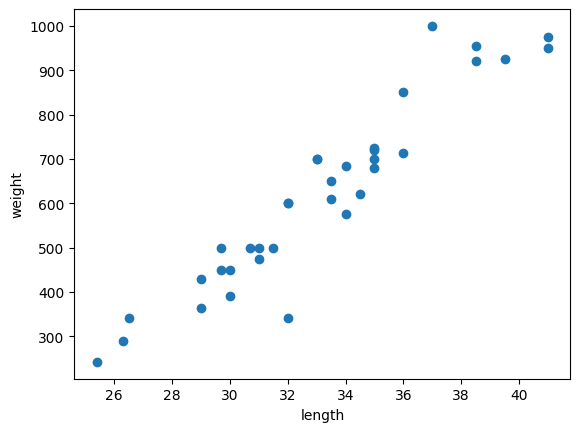

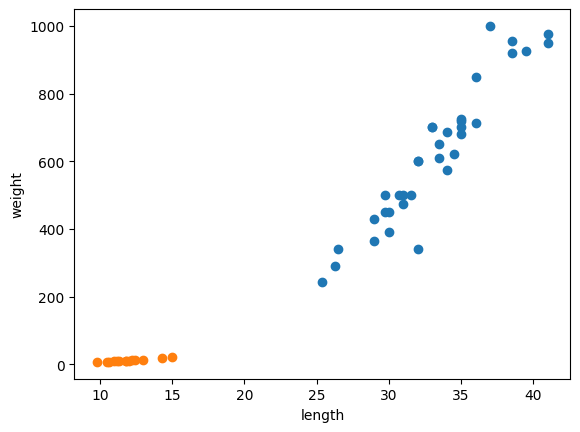

In [2]:
import matplotlib.pyplot as plt

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
                475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
                575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
                920.0, 955.0, 925.0, 975.0, 950.0]

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]
print(fish_data)

fish_target = [1] * 35 + [0] * 14

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)

print(kn.score(fish_data, fish_target))

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
1.0


In [5]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)

print(kn49.score(fish_data, fish_target))

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for i in range(5, 50):
    kn.n_neighbors = i
    score = kn.score(fish_data, fish_target)
    if score < 1:
        print(i, score)
        break

0.7142857142857143
18 0.9795918367346939


[0]


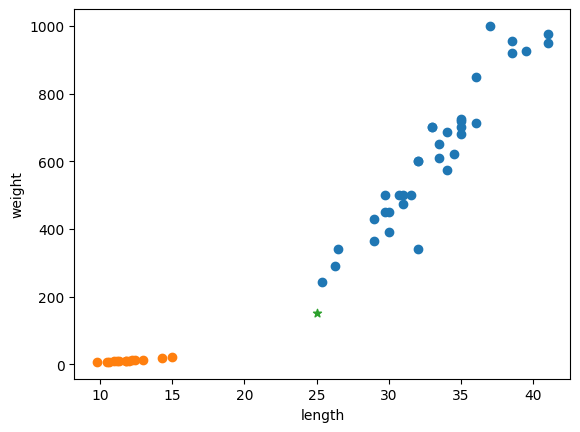

방어


In [6]:
print(kn.predict([[25.0, 150.0]]))

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(25.0, 150.0, marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

fish_class = kn.predict([[25.0, 150.0]])
if fish_class == 0:
    print('방어')
else:
    print('도미')

In [7]:
import numpy as np 

input_arr = np.array(fish_data) 
target_arr = np.array(fish_target)

In [8]:
np.random.seed(42) 
index = np.arange(49) # [0, 1, 2, ... , 48] 
np.random.shuffle(index) 

train_input = input_arr[index[:35]] 
train_target = target_arr[index[:35]]

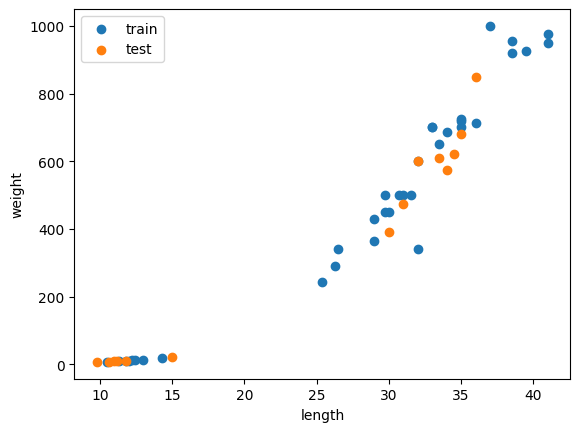

In [9]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:,0], train_input[:,1], label='train')
plt.scatter(test_input[:,0], test_input[:,1], label='test')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [10]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

print(kn.predict(test_input))
print(test_target)

1.0
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [12]:
print(kn.predict([[25.0, 150.0]]))

fish_class = kn.predict([[25.0, 150.0]])
if fish_class == 0:
    print('방어')
else:
    print('도미')

[0]
방어


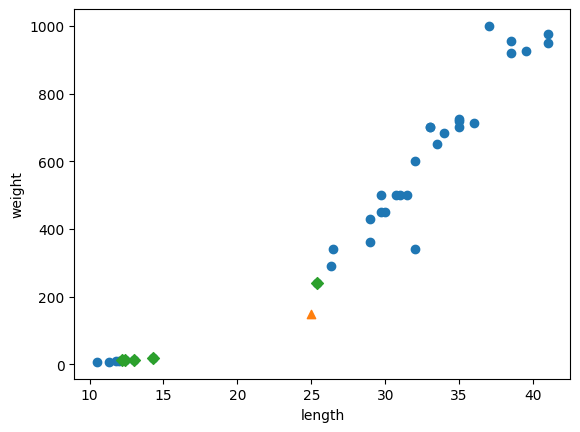

[[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]]


In [13]:
distances, indexes = kn.kneighbors([[25.0, 150.0]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(distances)

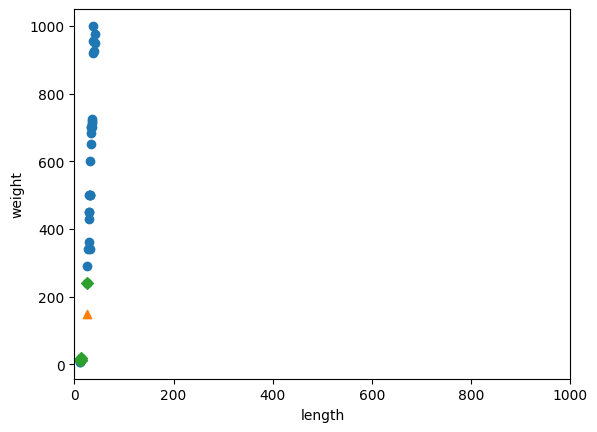

In [14]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[ 28.29428571 483.35714286] [  9.54606704 323.47456715]


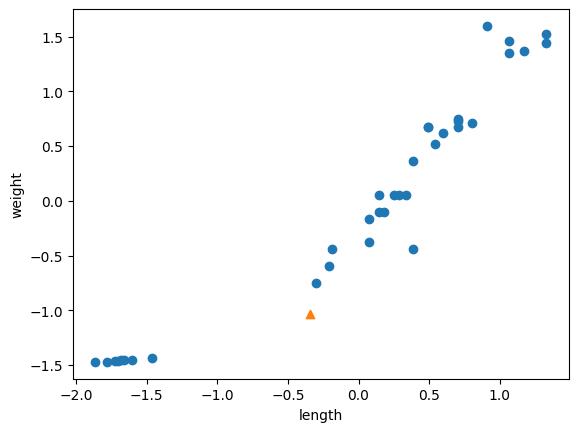

In [15]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

train_scaled = (train_input - mean) / std

new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)
print(kn.predict([new]))

if kn.predict([new]) == 0:
    print('방어')
else:
    print('도미')

[1]
도미
